In [1]:
import numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Исходная функция:

In [2]:
def f(x):
    return 3 * x**2

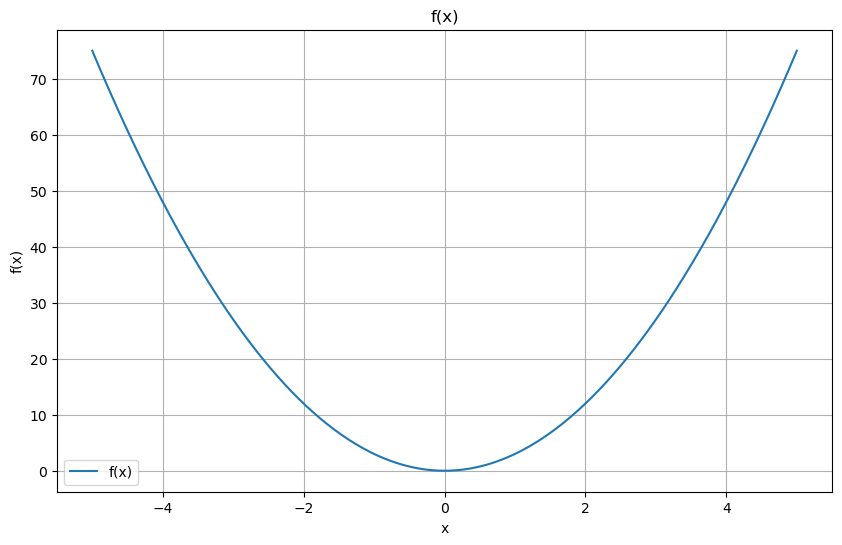

In [3]:
x_values = np.linspace(-5, 5, 400)
plt.figure(figsize=(10, 6))
plt.plot(x_values, f(x_values), label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x)')
plt.grid(True)
plt.legend()
plt.show()

### Производная и исходные данные:

In [4]:
df = grad(f)

In [5]:
x0 = 5.0
λ = 0.1
res = []

### Цикл и визуализация:

In [6]:
while True:
    res.append((x0, f(x0)))
    x1 = x0 - λ * df(x0)
    
    if np.linalg.norm(x0 - x1) < 0.00000001:
        break
    
    x0 = x1

In [7]:
# Преобразование результатов в массив numpy для удобства
res = np.array(res)

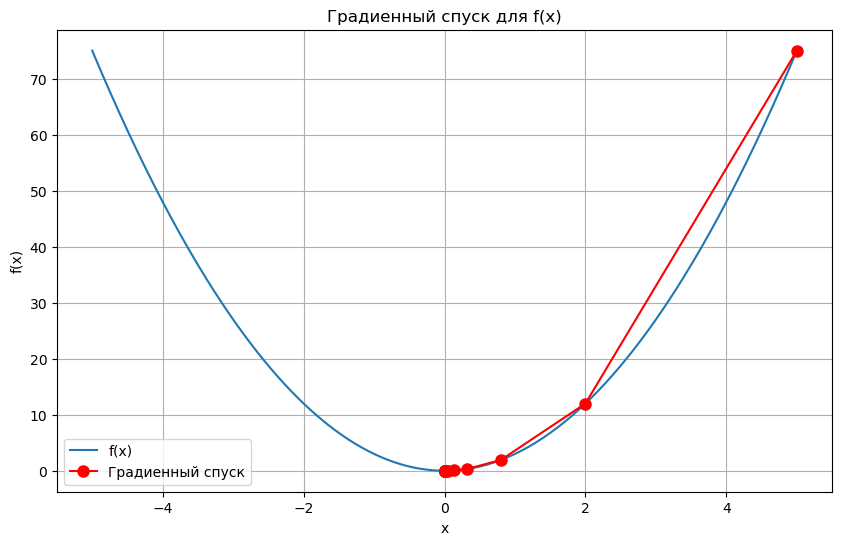

In [8]:
x_values = np.linspace(-5, 5, 400)
plt.figure(figsize=(10, 6))
plt.plot(x_values, f(x_values), label='f(x)')
plt.plot(res[:, 0], res[:, 1], 'ro-', label='Градиенный спуск', markersize=8)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Градиенный спуск для f(x)')
plt.grid(True)
plt.legend()
plt.show()

### Спуск с двумя перемнными:

In [9]:
def f(x, y):
    return 3 * x**2 + 5 * y**2

### Производная и исходные данные:

In [10]:
df = grad(f)

In [11]:
x0 = np.array([5.0, 10.0])  
λ = 0.1
res = []

### Цикл и визуализация:

In [12]:
while True:
    res.append((x0[0], x0[1], f(x0[0], x0[1])))
    x1 = x0 - λ * np.array(df(x0[0], x0[1]))
    
    if np.linalg.norm(x1 - x0) < 0.00000001:
        break
    
    x0 = x1

In [13]:
res = np.array(res)

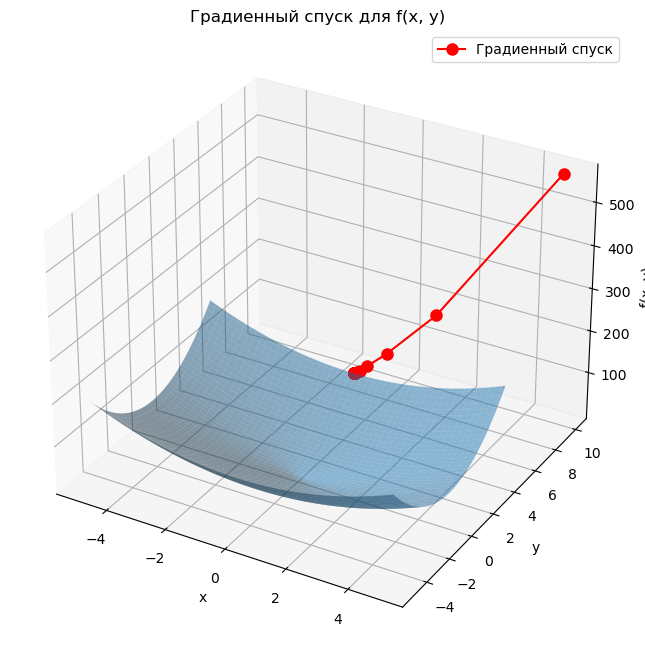

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(*np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)), f(*np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))), alpha=0.5)
ax.plot(res[:, 0], res[:, 1], res[:, 2], 'ro-', label='Градиенный спуск', markersize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Градиенный спуск для f(x, y)')
plt.legend()
plt.show()
